In [ ]:
!pip install retina-face

In [ ]:
#Import Retinaface, CV2 and Matplotlib
from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
def read_image(frame1, frame2):
  #Read and display the image
  img1 = cv2.imread(frame1)
  cv2_imshow(img1)
  img2 = cv2.imread(frame2)
  cv2_imshow(img2)
  return img1, img2

In [ ]:
def detect_faces(img1, img2):
  #Detect all the faces in the frame using RetinaFace
  img1_faces = RetinaFace.detect_faces(img1)
  img2_faces = RetinaFace.detect_faces(img2)
  return img1_faces, img2_faces

In [ ]:
def extract_features(img1_faces, img2_faces):
  # extract facial co-ordiantes and features of all faces
  features1=[]
  for i in img1_faces:
    choose = img1_faces[i]
    features1.append([choose['facial_area'],choose['landmarks']['mouth_right'],choose['landmarks']['mouth_left']])
    print(choose)
  features2=[]
  for j in img2_faces:
    choose = img2_faces[j]
    features2.append([choose['facial_area'],choose['landmarks']['mouth_right'],choose['landmarks']['mouth_left']])
    print(choose)
  return features1, features2

In [ ]:
#Iterate all objects key areas and mark only face area
def face_detection(img1_faces, img2_faces, img1, img2):
  for i in img1_faces.keys():
    facial_parts1 = img1_faces[i]
    recognize_face_area1 = facial_parts1["facial_area"]
    cv2.rectangle(img1, (recognize_face_area1[2], recognize_face_area1[3]), (recognize_face_area1[0], recognize_face_area1[1]), (255, 255, 255), 1)

  for j in img2_faces.keys():
    facial_parts2 = img2_faces[j]
    recognize_face_area2 = facial_parts2["facial_area"]
    cv2.rectangle(img2, (recognize_face_area2[2], recognize_face_area2[3]), (recognize_face_area2[0], recognize_face_area2[1]), (255, 255, 255), 1)
  #Diplay Face Area
  plt.figure(figsize= (10, 10))
  plt.imshow(img1[:, :, ::-1])
  plt.show()
  plt.figure(figsize= (10, 10))
  plt.imshow(img2[:, :, ::-1])
  plt.show()

In [ ]:
#Extract individual faces from the image
import matplotlib.pyplot as plt
def extract_faces(img1):
  ext_faces = RetinaFace.extract_faces(img_path = img1 , align = True)
  for face in ext_faces:
    plt.imshow(face)
    plt.show()

In [ ]:
import numpy as np

In [ ]:
def detect_features(features1, features2):
  facial_cord=[]
  mouth_cord=[]
  for i in range(len(features1)):
    facial_cord.append(list(np.subtract(features1[i][0], features2[i][0])))
    # facial_area = features1[i][0]
    # print (facial_area)
    # if (facial_area[0]>0.5 or facial_area[1]>0.5 or facial_area[2]>0.5 or facial_area[3]<0.5):
    mouth=[]
    mouth.append(list(np.subtract(features1[i][1], features2[i][1])))
    mouth.append(list(np.subtract(features1[i][2], features2[i][2])))
    mouth_cord.append(mouth)
  return facial_cord, mouth_cord

In [ ]:
def detect_speaker(facial_cord, mouth_cord):
  #thresholding to detect active speaker
  person=[]
  for i in range(len(facial_cord)):
    if ((facial_cord[i][0] or facial_cord[i][1] or facial_cord[i][2] or facial_cord[i][3])>5 or ((facial_cord[i][0] or facial_cord[i][1] or facial_cord[i][2] or facial_cord[i][3])<5)):
      if ((abs(mouth_cord[i][0][0]) and abs(mouth_cord[i][0][1]) and abs(mouth_cord[i][1][0]) and abs(mouth_cord[i][1][1]))>0.5):
        person.append(1)
      else:
        person.append(0)
    else:
      person.append(0)
  return person

In [ ]:
def highlight_speaker(img2_faces, person, img2):
  print(person)
  x=0
  for i in img2_faces.keys():
    facial_parts = img2_faces[i]
    #print(choose)
    recognize_face_area2 = facial_parts["facial_area"]
    if (person[x]==0):
      cv2.rectangle(img2, (recognize_face_area2[2], recognize_face_area2[3]), (recognize_face_area2[0], recognize_face_area2[1]), (0, 0, 255), 2)
    else:
      cv2.rectangle(img2, (recognize_face_area2[2], recognize_face_area2[3]), (recognize_face_area2[0], recognize_face_area2[1]), (255, 0, 0), 2)
    x+=1
  plt.figure(figsize= (10, 10))
  plt.imshow(img2[:, :, ::-1])
  plt.show()

In [ ]:
def video_model(img1,img2):
  # img1, img2 = read_image(frame1, frame2)
  img1_faces, img2_faces = detect_faces(img1, img2)
  features1, features2 = extract_features(img1_faces, img2_faces)
  face_detection(img1_faces, img2_faces, img1, img2)
  extract_faces(img1)
  facial_cord, mouth_cord=detect_features(features1, features2)
  person = detect_speaker(facial_cord, mouth_cord)
  highlight_speaker(img2_faces, person, img2)
  return person, img1_faces

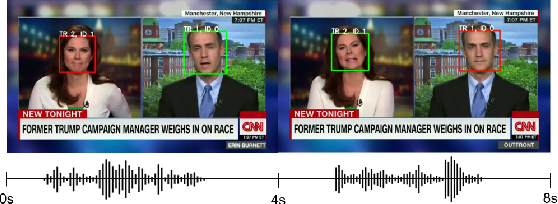

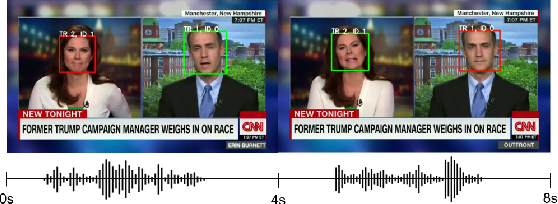

{'score': 0.9996041655540466, 'facial_area': [189, 31, 219, 73], 'landmarks': {'right_eye': [196.77998, 48.622795], 'left_eye': [210.25902, 47.118088], 'nose': [203.80034, 56.085663], 'mouth_right': [200.24565, 63.900272], 'mouth_left': [210.57964, 62.58127]}}
{'score': 0.99954754114151, 'facial_area': [335, 33, 364, 68], 'landmarks': {'right_eye': [341.8558, 47.88452], 'left_eye': [354.69885, 45.615307], 'nose': [348.77557, 52.234386], 'mouth_right': [345.36215, 59.913322], 'mouth_left': [356.2528, 57.866463]}}
{'score': 0.9995457530021667, 'facial_area': [464, 31, 493, 70], 'landmarks': {'right_eye': [471.49368, 47.207024], 'left_eye': [484.9155, 46.170662], 'nose': [478.45923, 55.220158], 'mouth_right': [474.4674, 61.975353], 'mouth_left': [484.61328, 61.045868]}}
{'score': 0.999426007270813, 'facial_area': [63, 36, 90, 72], 'landmarks': {'right_eye': [71.21129, 50.47539], 'left_eye': [83.55337, 50.88494], 'nose': [77.106125, 56.94852], 'mouth_right': [72.089775, 63.206306], 'mouth_

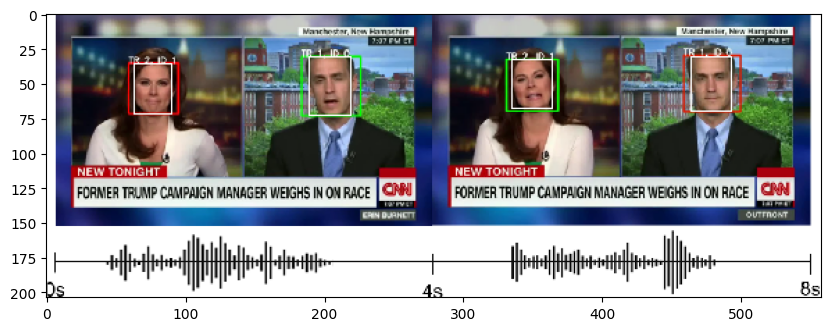

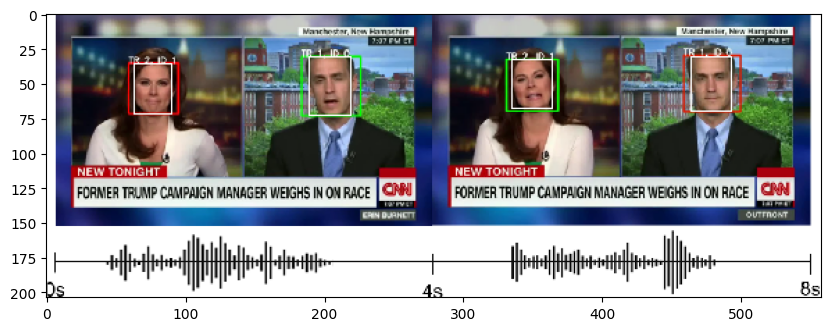

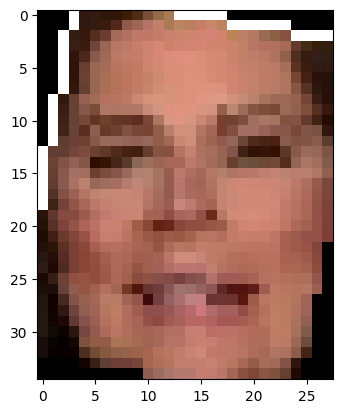

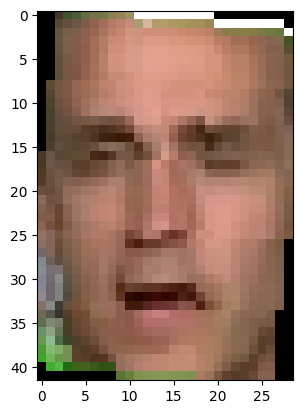

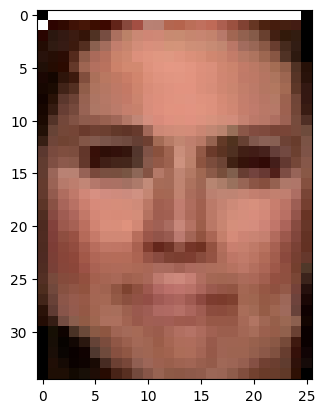

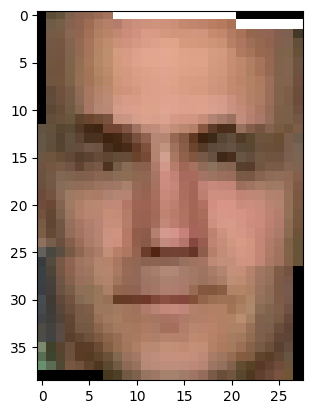

[0, 0, 0, 0]


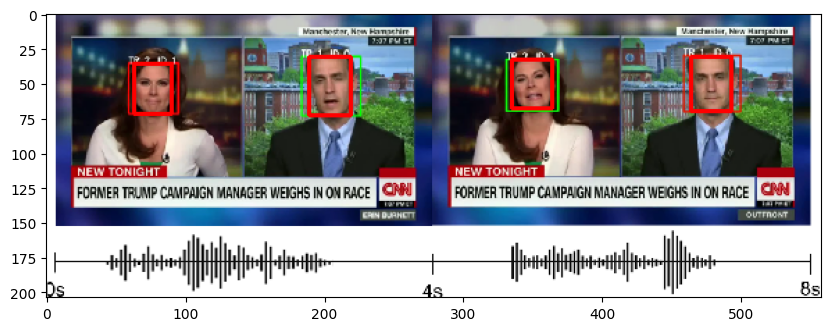

[0, 0, 0, 0]


In [ ]:
# frame1='/content/1-Figure1-1.png'
# frame2='/content/1-Figure1-1.png'
# speaker, img1_faces=video_model(frame1, frame2)
# print(speaker)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# frame1='/content/drive/MyDrive/FYP/output_frames/frame_0000.jpg'
# frame2='/content/drive/MyDrive/FYP/output_frames/frame_0000.jpg'
# speaker, img1_faces=video_model(frame1, frame2)
# print(speaker)

Output hidden; open in https://colab.research.google.com to view.